In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('WineQuality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [112]:
df = df.drop(['Id'], axis=1)

In [113]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot: xlabel='quality', ylabel='chlorides'>

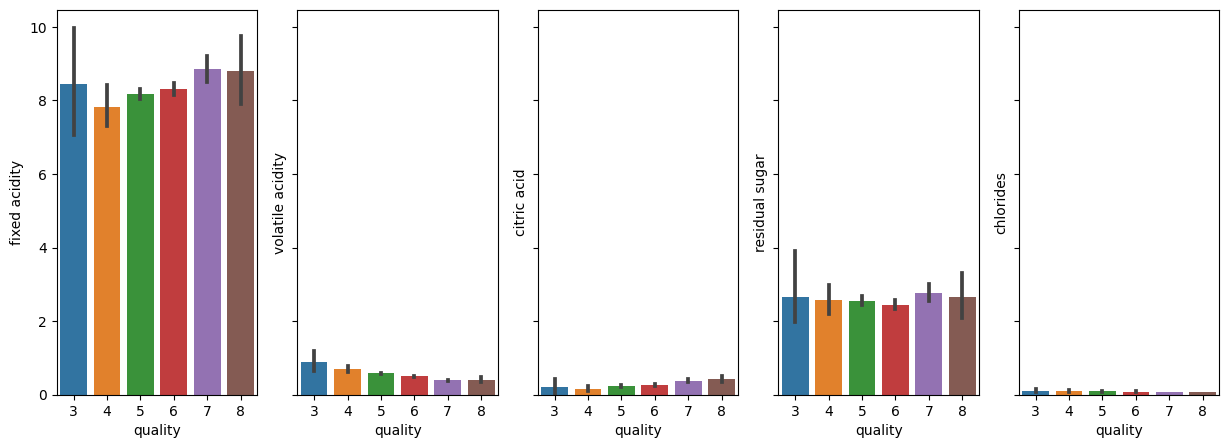

In [202]:

fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0], x='quality', y='fixed acidity', data=df)
sns.barplot(ax=axes[1], x='quality', y='volatile acidity', data = df)
sns.barplot(ax=axes[2], x='quality', y='citric acid', data = df)
sns.barplot(ax=axes[3], x='quality', y='residual sugar', data = df)
sns.barplot(ax=axes[4], x='quality', y='chlorides', data = df)

<AxesSubplot: xlabel='quality', ylabel='alcohol'>

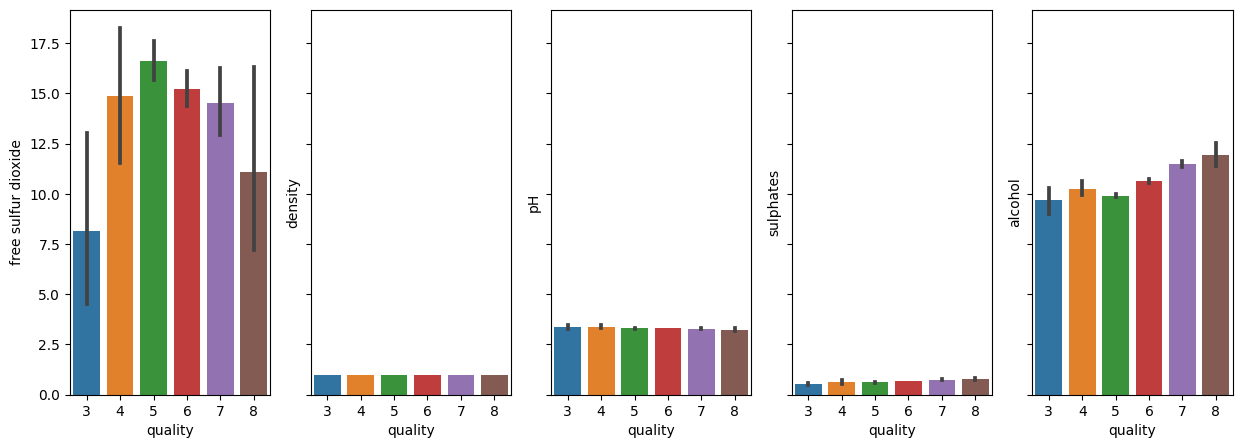

In [203]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0], x='quality', y='free sulfur dioxide', data = df)
sns.barplot(ax=axes[1], x='quality', y='density', data = df)
sns.barplot(ax=axes[2], x='quality', y='pH', data = df)
sns.barplot(ax=axes[3], x='quality', y='sulphates', data = df)
sns.barplot(ax=axes[4], x='quality', y='alcohol', data = df)

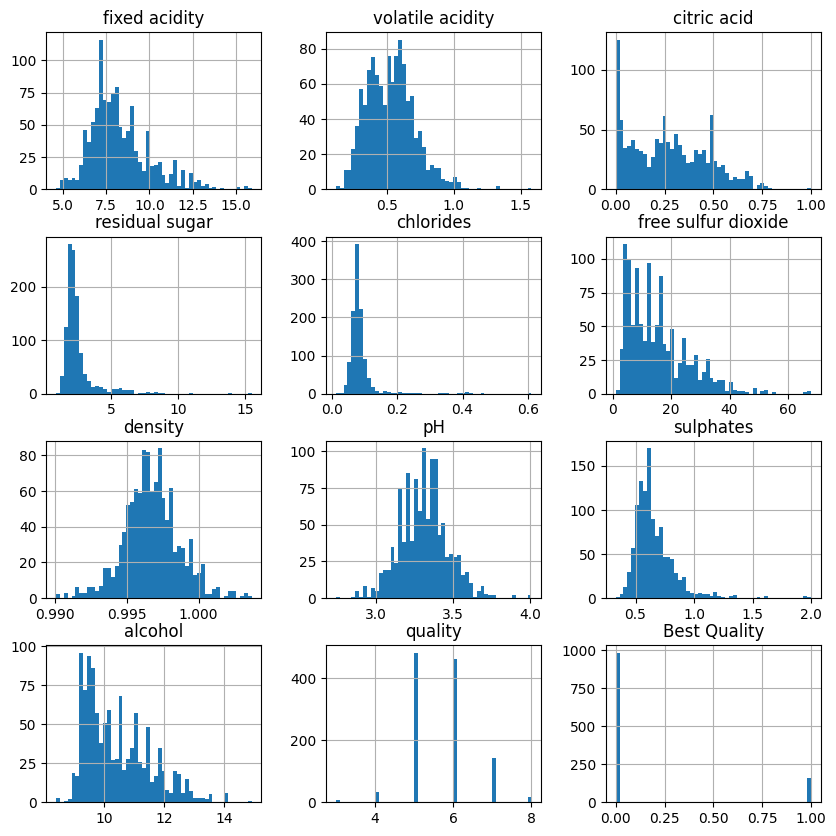

In [109]:
df.hist(bins=50, figsize=(10, 10))
plt.show()

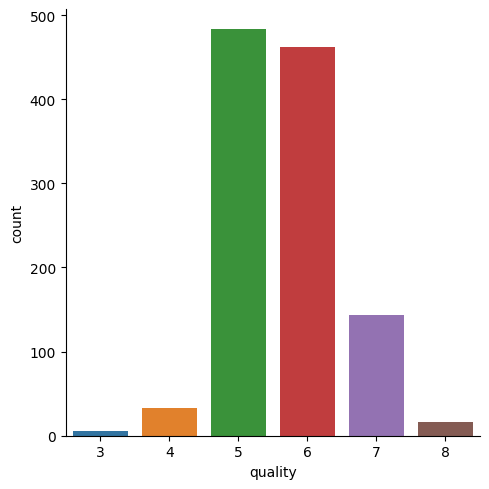

In [114]:
sns.catplot(x='quality', data = df, kind = 'count')

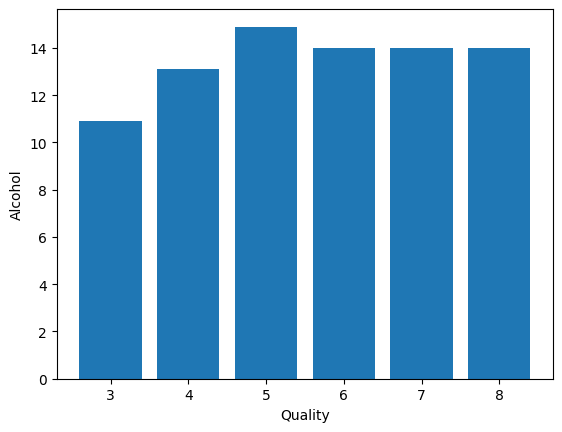

In [115]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

<h2>Constructing a Heatmap  to Understand the correlation between the columns

<AxesSubplot: >

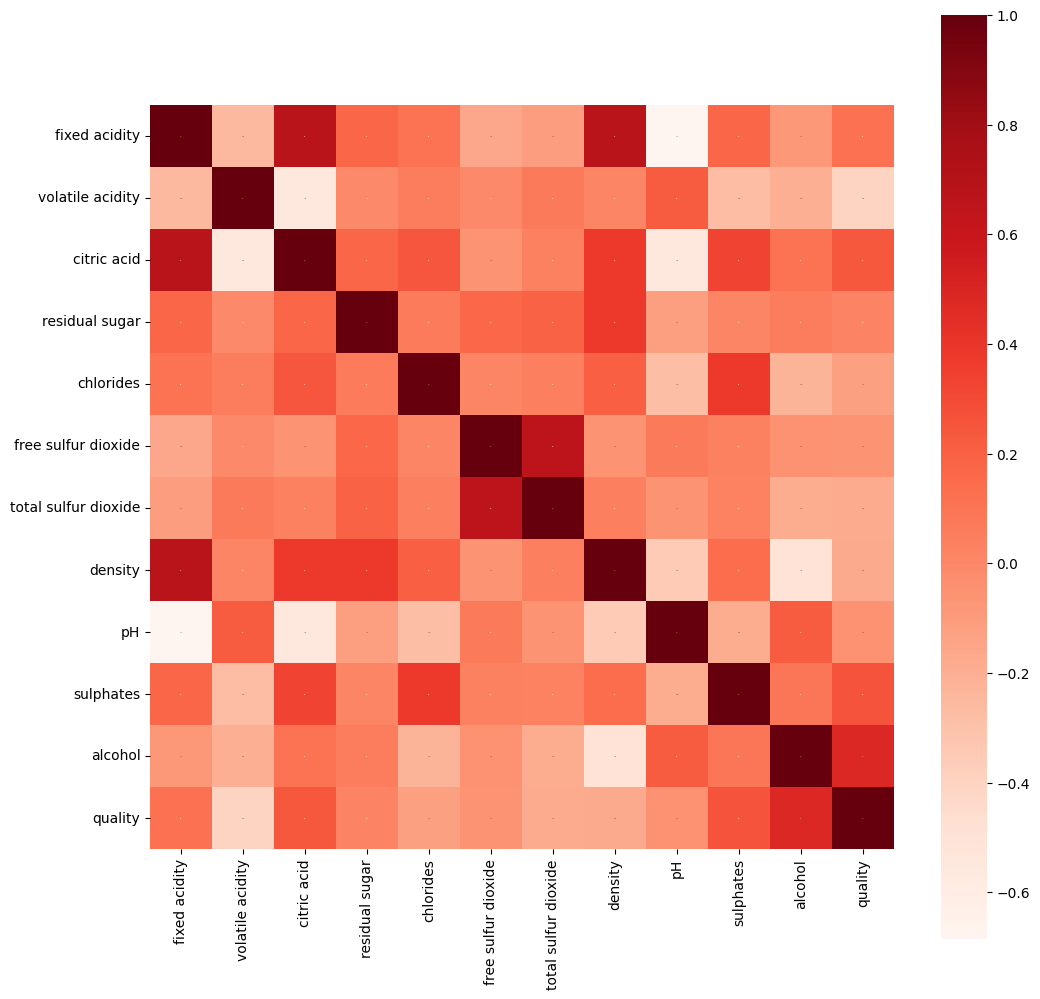

In [116]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':0}, cmap='Reds')
# sns.heatmap(df.corr()> 0.7, annot=True, cbar=False)
# plt.show()

In [117]:
df = df.drop('total sulfur dioxide', axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5


In [118]:
df.replace({'white' : 1, 'red' : 0}, inplace=True)


<h1>Data Preprocessing
<h2> Separating the data and label

In [124]:
X = df.drop(['quality'], axis=1)

<h1>Label Binarization

In [125]:
df['Best Quality'] = [1 if x>=7 else 0 for x in df.quality]
Y = df['Best Quality']

In [106]:

df['Best Quality'].value_counts()

0    984
1    159
Name: Best Quality, dtype: int64

<h1>Train and Test Split

In [122]:
from sklearn.preprocessing import StandardScaler
X_feat = X
X = StandardScaler().fit_transform(X)


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=3)
# .25 means 25% of orignal data

In [127]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1143,) (857,) (286,)


<h1>Model Training

In [212]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train, Y_train)

DecisionTreeClassifier()

<h3>Model Evaluation


In [213]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred1 = model1.predict(X_test)
print(classification_report(Y_test, y_pred1))
test_data_accuracy = accuracy_score(y_pred1, Y_test)
print("Accuracy in test data : ", test_data_accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00        49

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286

Accuracy in test data :  1.0


In [214]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(Y_test, y_pred2))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       1.00      1.00      1.00        49

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286



<h1>Building a Predictive System


In [215]:
input_data = (7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1, -1)

prediction = model1.predict(input_data)
print(prediction)

if(prediction[0] == 1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

[1]
Good Quality Wine


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [219]:
feat_importances = pd.Series(model2.feature_importances_, index=X_feat.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

ValueError: Length of values (11) does not match length of index (10)

In [220]:
df_temp = df[df['Best Quality']==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,Best Quality
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.0
mean,8.846541,0.395314,0.391195,2.748428,0.074711,14.188679,0.996019,3.282453,0.745849,11.528407,7.100629,1.0
std,2.097038,0.134869,0.195116,1.400818,0.029154,9.903279,0.002283,0.156297,0.141459,1.007960,0.301787,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,0.990640,2.880000,0.390000,9.200000,7.000000,1.0
25%,7.400000,0.300000,0.320000,1.900000,0.062000,6.000000,0.994610,3.200000,0.660000,10.800000,7.000000,1.0
50%,8.700000,0.360000,0.410000,2.300000,0.073000,12.000000,0.995680,3.270000,0.740000,11.600000,7.000000,1.0
75%,10.100000,0.480000,0.520000,2.800000,0.083500,17.500000,0.997350,3.375000,0.835000,12.250000,7.000000,1.0
max,15.600000,0.850000,0.760000,8.300000,0.358000,53.000000,1.003200,3.780000,1.360000,14.000000,8.000000,1.0


In [221]:
# Filtering df for only bad quality
df_temp2 = df[df['Best Quality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,Best Quality
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.0
mean,8.224593,0.553318,0.248516,2.497205,0.088908,15.846037,0.996845,3.315630,0.643465,10.266582,5.423780,0.0
std,1.669548,0.176316,0.189707,1.345994,0.049304,10.291822,0.001836,0.156313,0.170459,0.987707,0.590087,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.430000,0.080000,1.900000,0.071000,7.000000,0.995727,3.210000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.550000,0.240000,2.200000,0.080000,14.000000,0.996765,3.315000,0.600000,10.000000,5.000000,0.0
75%,9.000000,0.660000,0.400000,2.600000,0.091000,21.000000,0.997900,3.410000,0.692500,10.900000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,1.003690,4.010000,2.000000,14.900000,6.000000,0.0
